In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/raw/base_maturidade_final.csv', usecols=lambda column: column != 'Unnamed: 0')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientes_ativos         10000 non-null  int64  
 1   faturamento_mensal      10000 non-null  int64  
 2   faturamento_acumulado   10000 non-null  int64  
 3   anos_empresa            10000 non-null  float64
 4   tipo_servico            10000 non-null  object 
 5   ticket_medio            10000 non-null  float64
 6   mix_receita             10000 non-null  object 
 7   canais_vendas           10000 non-null  int64  
 8   churn                   10000 non-null  float64
 9   parcerias               10000 non-null  object 
 10  investimento_externo    10000 non-null  object 
 11  branding_reputacao      10000 non-null  object 
 12  network_time            10000 non-null  object 
 13  uso_tecnologia          10000 non-null  object 
 14  roadmap_produto         10000 non-null 

In [53]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print()


Coluna: tipo_servico
['Serviço' 'Produto']

Coluna: mix_receita
['3–5 clientes >50%' 'Receita diversificada' '1–2 clientes >50%']

Coluna: parcerias
['Algumas' 'Poucas' 'Muitas' 'Nenhuma']

Coluna: investimento_externo
['Série A+' 'Aceleradora/Anjo' 'Não' 'Seed/Pré-Série A']

Coluna: branding_reputacao
['Reconhecimento forte' 'Não reconhecida' 'Algum reconhecimento']

Coluna: network_time
['Sim, forte' 'Ocasionalmente' 'Não']

Coluna: uso_tecnologia
['Alto' 'Médio' 'Baixo']

Coluna: roadmap_produto
['Parcial' 'Não existe' 'Claro e executado']

Coluna: eficiencia_operacional
['Parcialmente' 'Quase tudo' 'Quase nada']

Coluna: escala_tecnologica
['Parcialmente' 'Não' 'Sim']

Coluna: financas_unidade
['Algumas' 'Não' 'Sim, regularmente']

Coluna: experiencia_lideranca
['Experiência forte' 'Sem experiência' 'Experiência parcial']

Coluna: treinamento
['Às vezes' 'Regularmente' 'Nunca']

Coluna: governanca_financeira
['Não existem controles' 'DRE e auditoria' 'Controles básicos']



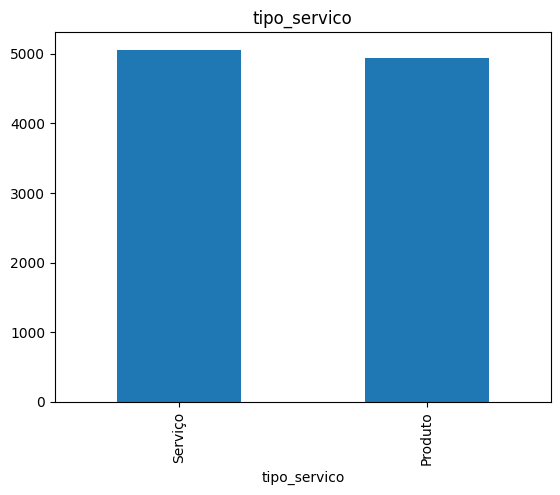

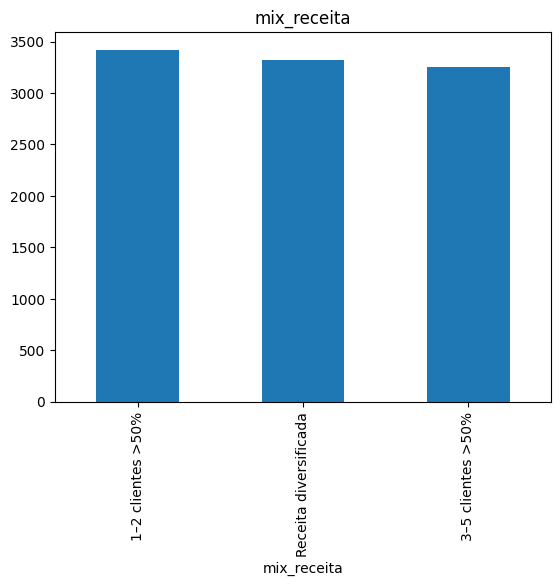

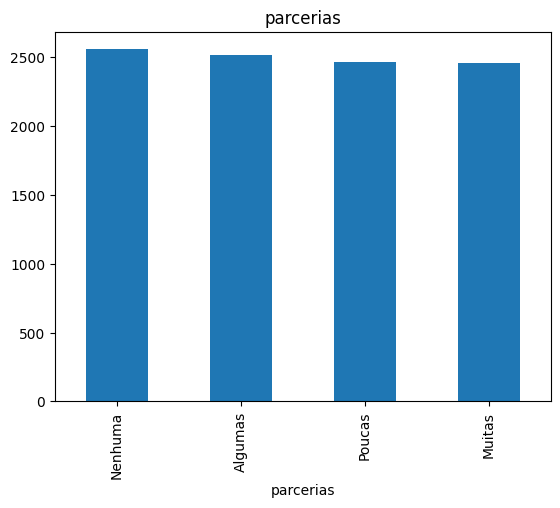

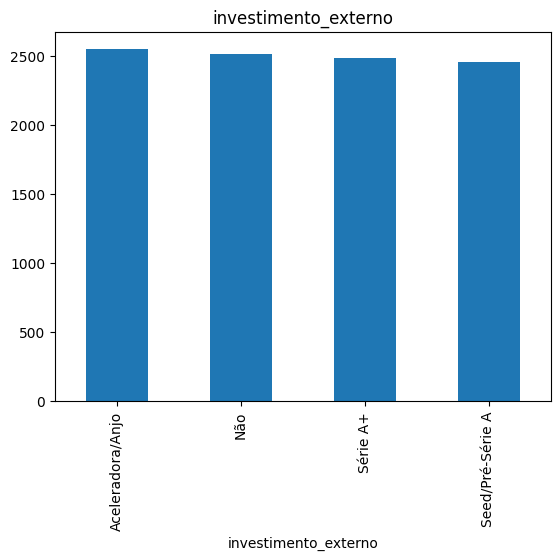

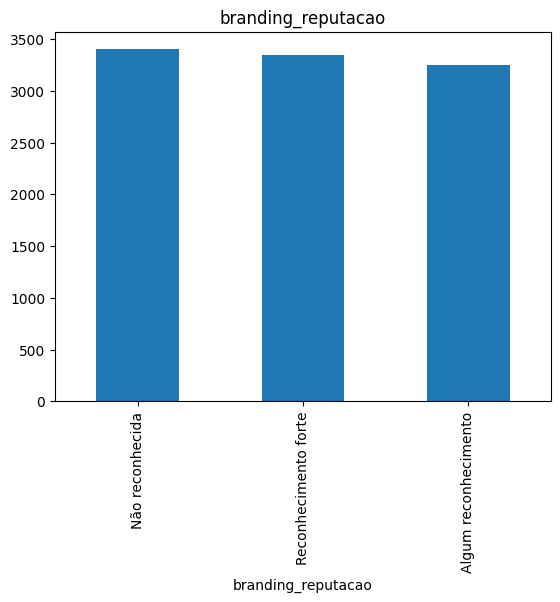

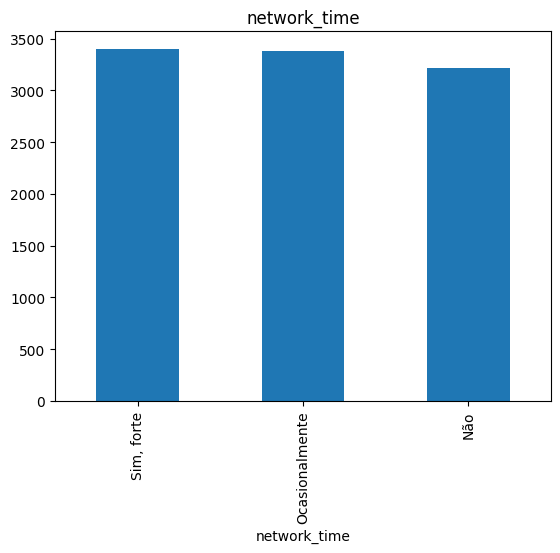

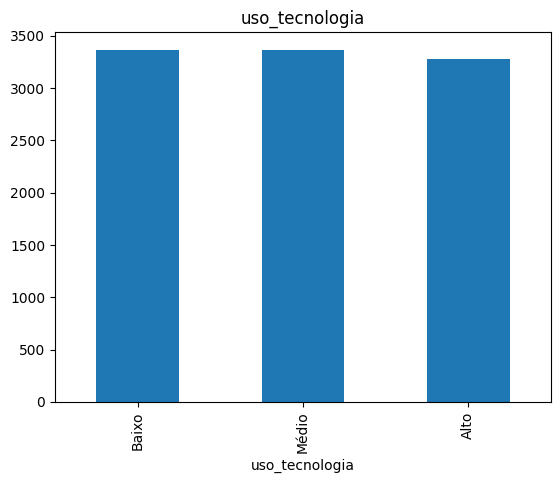

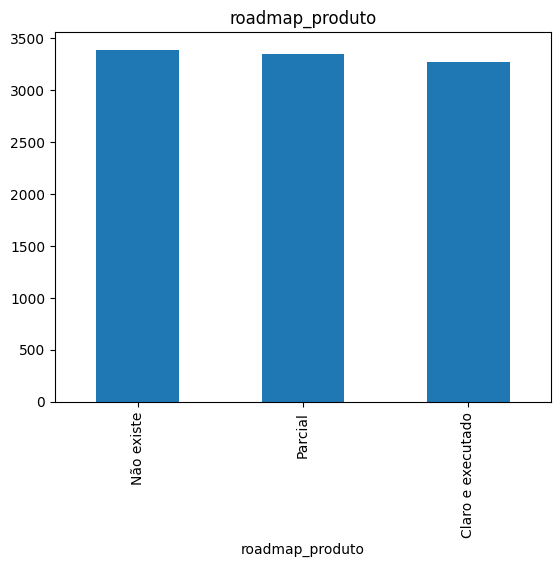

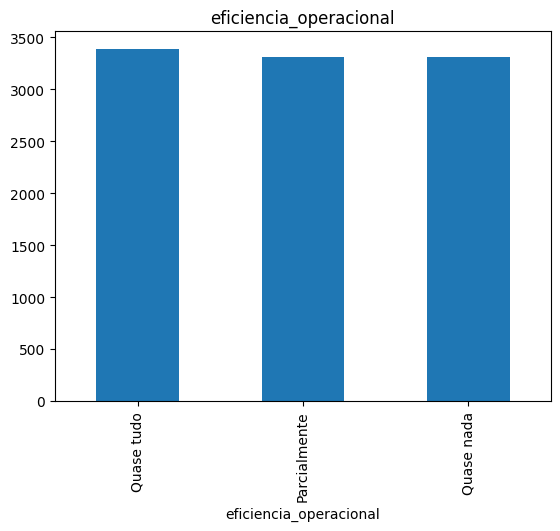

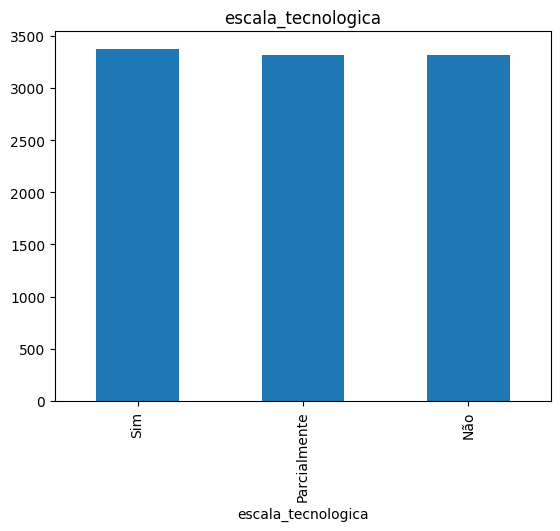

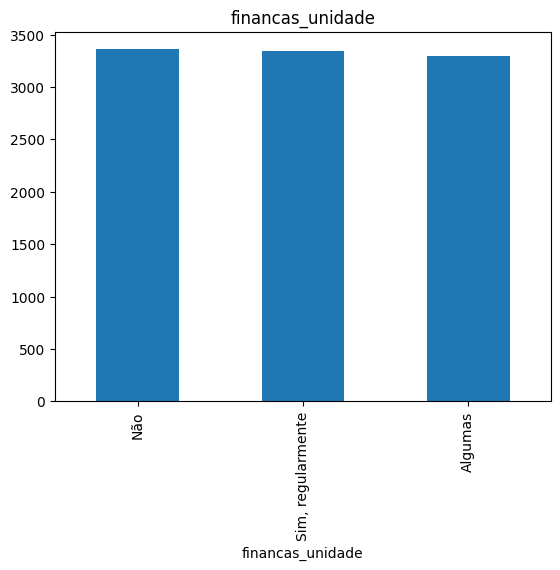

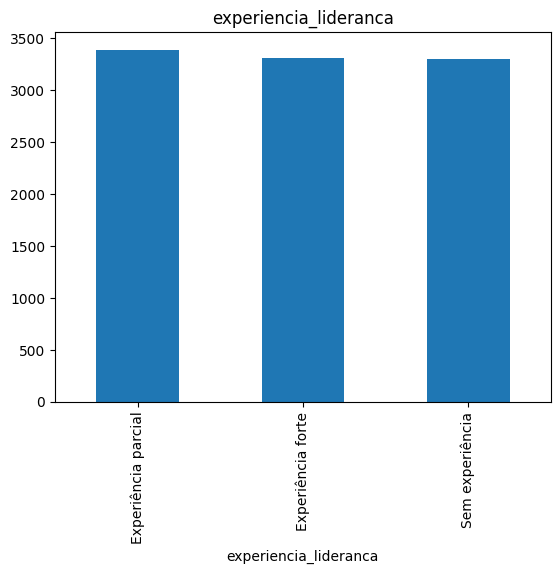

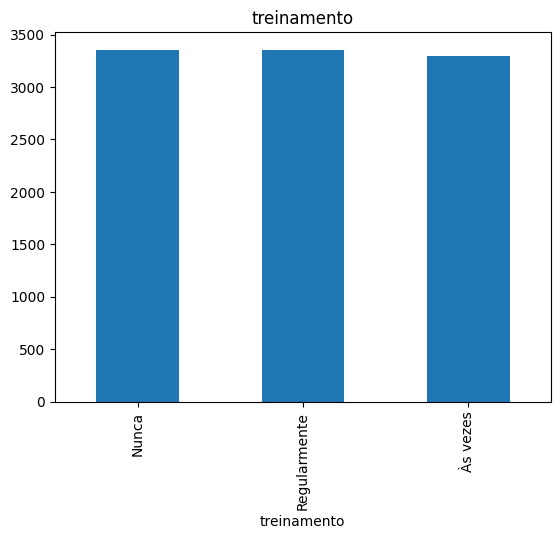

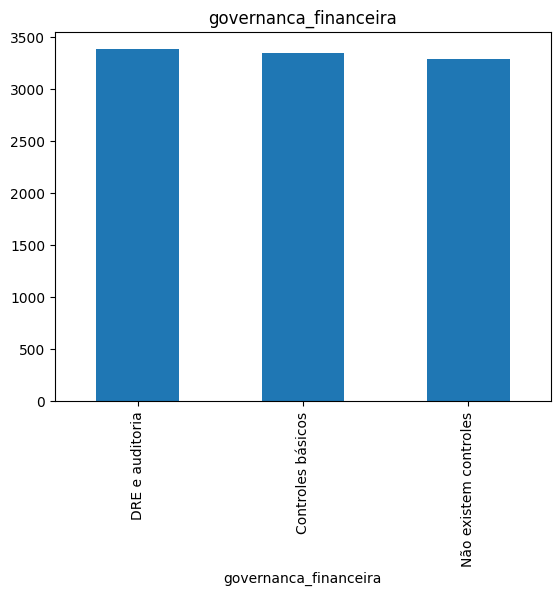

In [54]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()

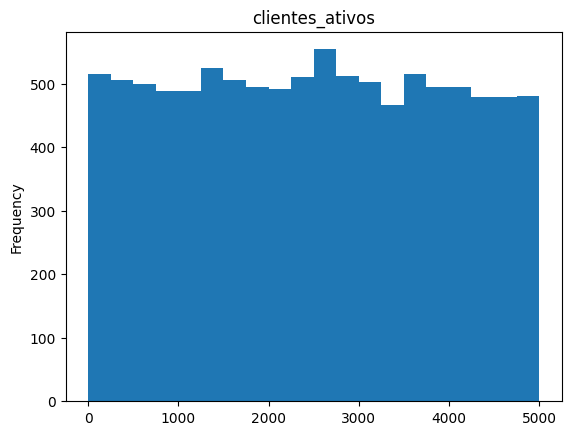

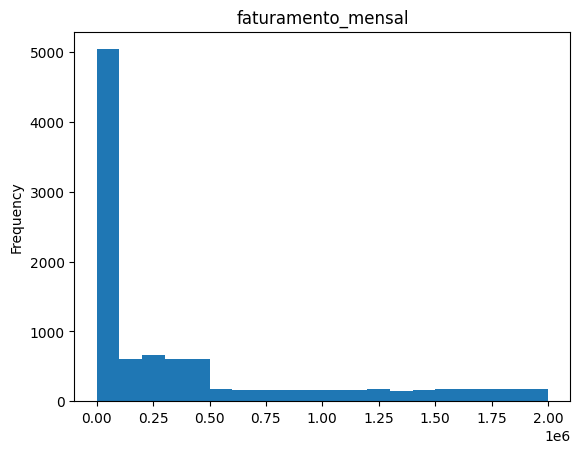

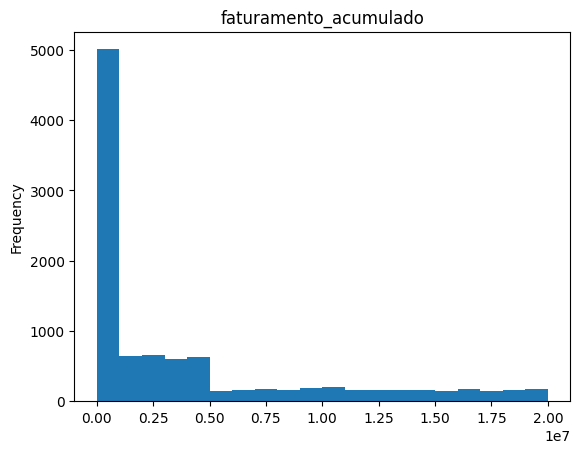

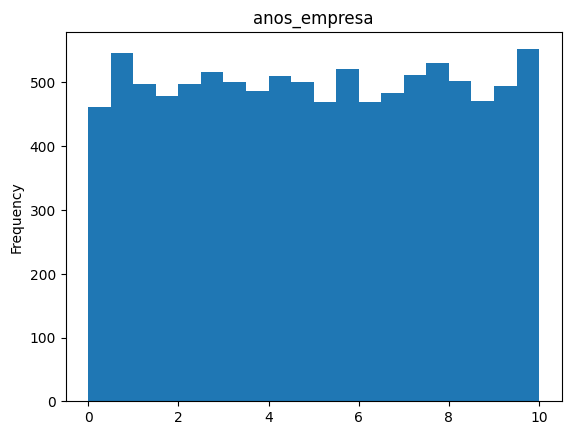

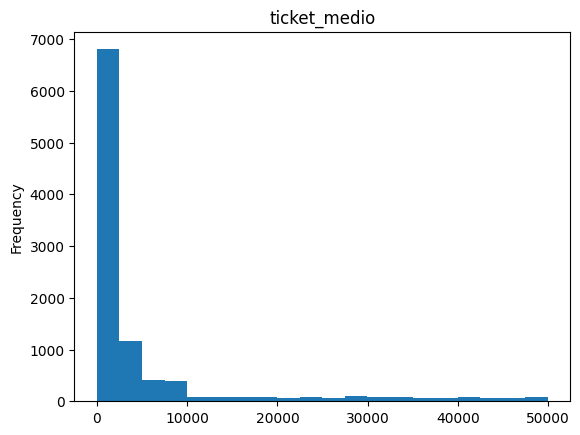

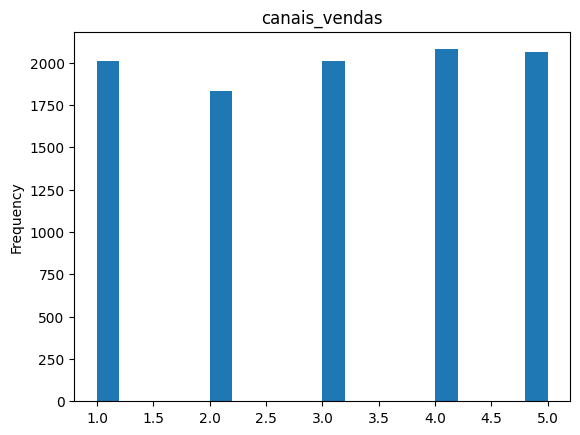

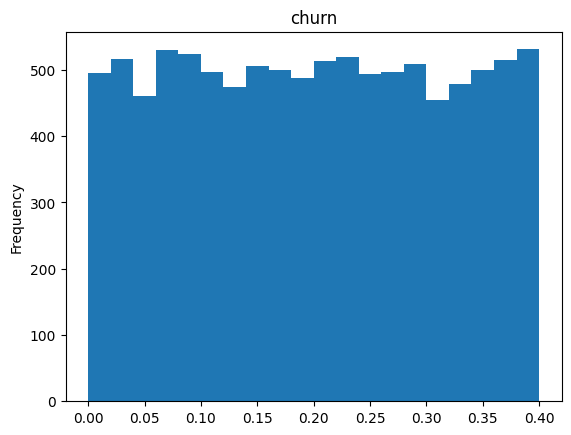

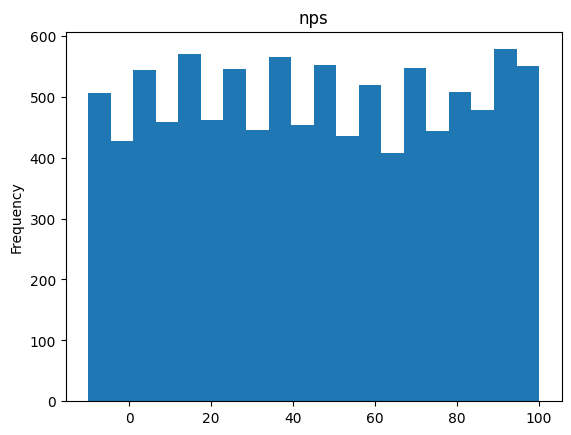

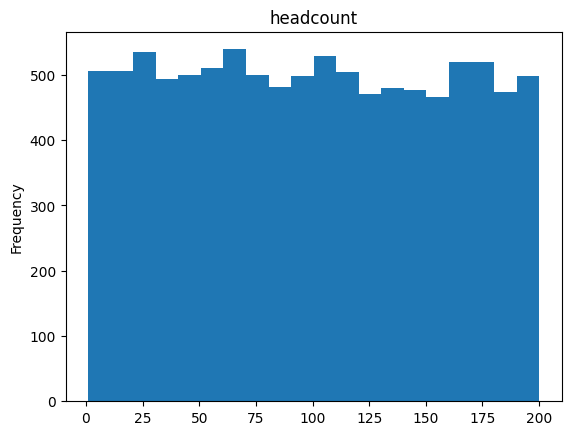

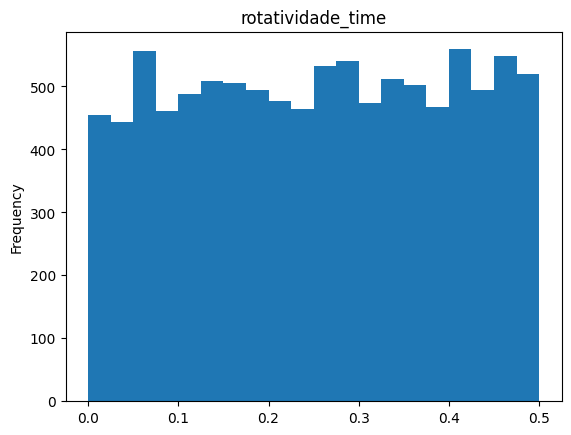

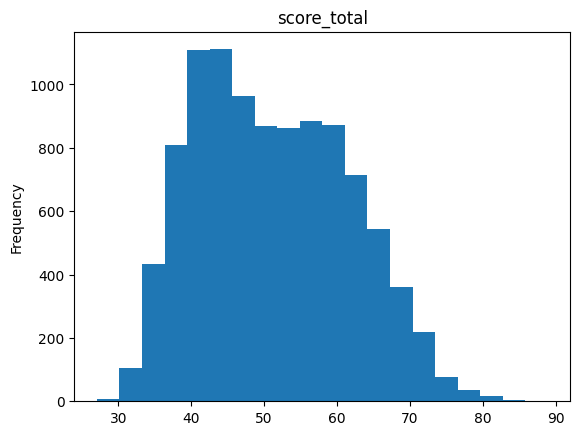

In [55]:
# plote um histograma de cada coluna numerica
for col in df.select_dtypes(include=['number']).columns:
    df[col].plot(kind='hist', title=col, bins=20)
    plt.show()
    

In [56]:
df['score_total'].value_counts().sort_index(ascending=False)

score_total
88.93    1
86.38    1
83.13    1
83.02    1
82.96    1
        ..
29.44    1
29.27    2
28.07    1
28.01    1
27.08    2
Name: count, Length: 3666, dtype: int64

In [57]:
# Quantos valores eu tenho nos intervalos de score total de 0-20, 21-40, 41-60, 61-80, 81-100
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['score_total_binned'] = pd.cut(df['score_total'], bins=bins, labels=labels, include_lowest=True)
df['score_total_binned'].value_counts().sort_index(ascending=False)

score_total_binned
81-100      20
61-80     2253
41-60     6182
21-40     1545
0-20         0
Name: count, dtype: int64

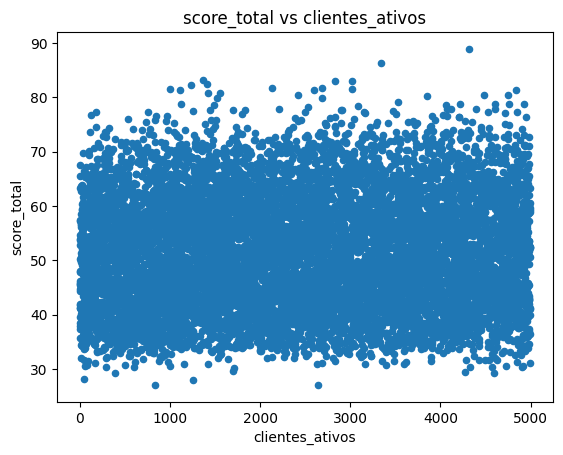

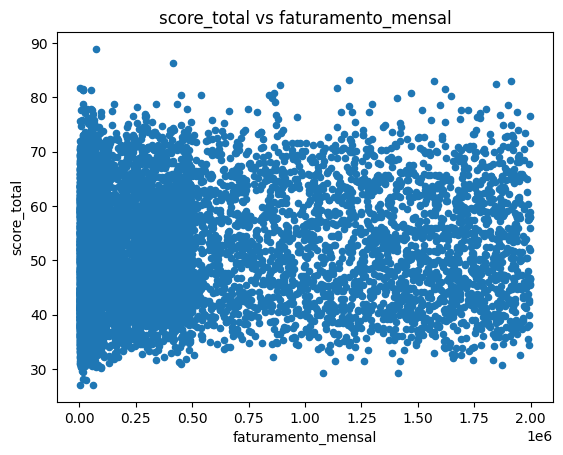

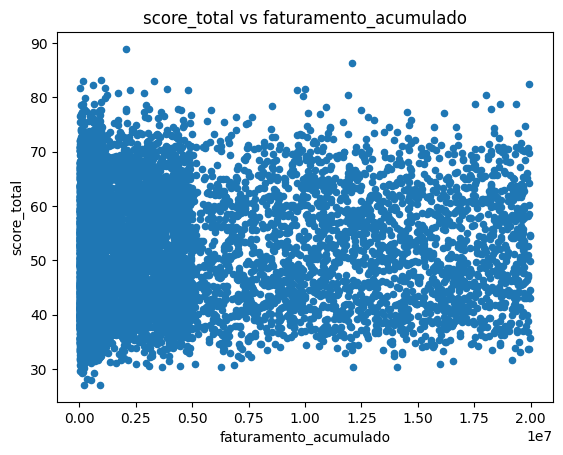

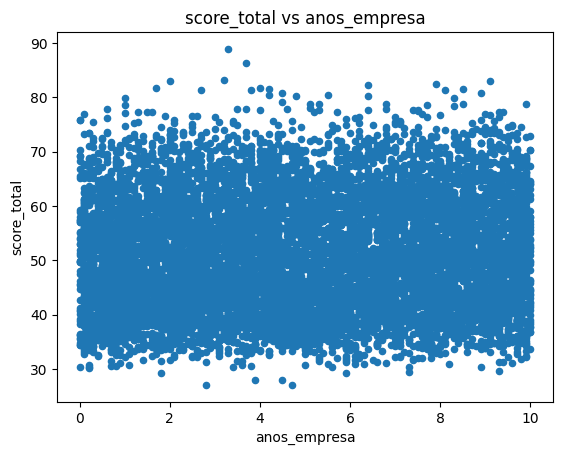

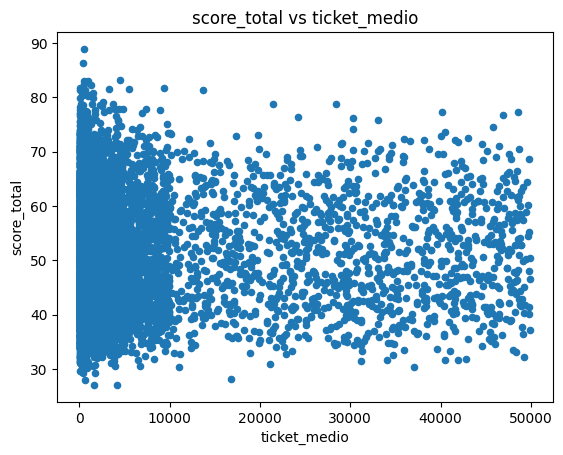

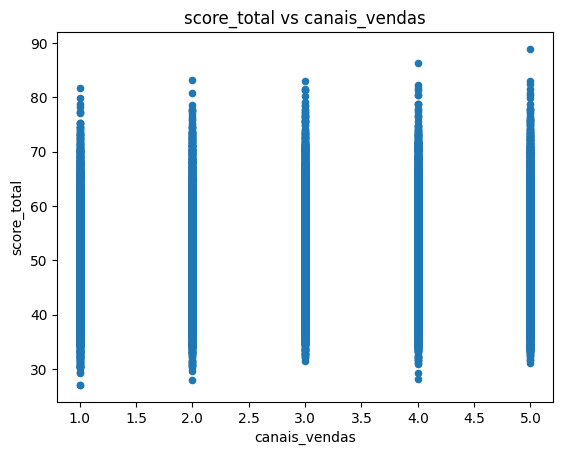

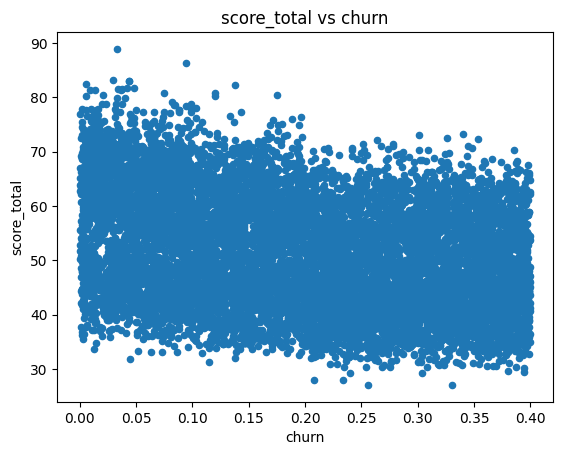

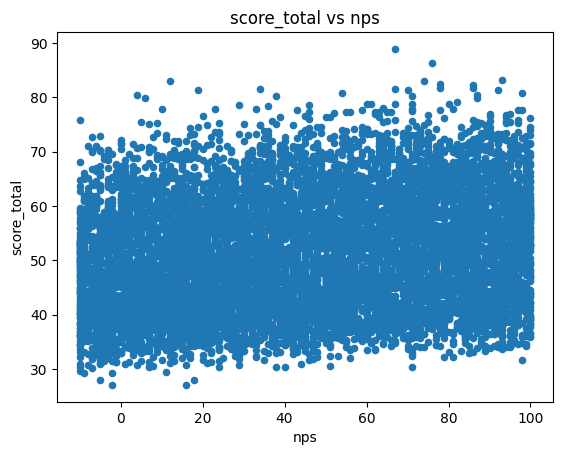

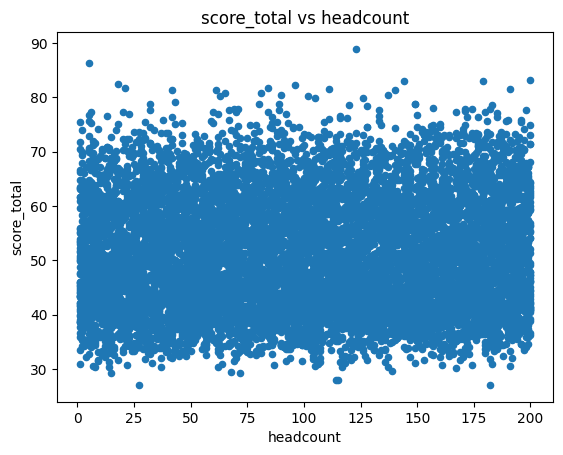

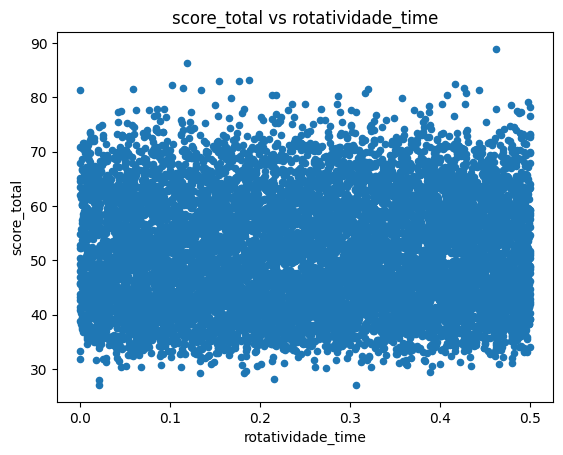

In [58]:
# Scatter plot de cada coluna numerica em relacao ao score total
for col in df.select_dtypes(include=['number']).columns:
    if col != 'score_total':
        df.plot(kind='scatter', x=col, y='score_total', title=f'score_total vs {col}')
        plt.show()